In [2]:
from dask.distributed import Client

client = Client()


In [113]:

%%time
import dask.dataframe as dd

df = dd.read_csv('/tmp/train_test_small.csv')
df


CPU times: user 435 ms, sys: 16.6 ms, total: 452 ms
Wall time: 470 ms


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,float64,int64,object,float64,float64,object,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [123]:
df = df.persist()

In [144]:
%%time
df_delay = df[df['PRCP'] > 0]
df_delay = df_delay[df_delay['AIRLINE_FLIGHTS_MONTH'] > 1000]
df_delay = df_delay[df_delay['NUMBER_OF_SEATS'] > 100]
df_delay = df_delay[df_delay['CONCURRENT_FLIGHTS'] > 5]
df_delay = df_delay[df_delay['DEP_DEL15'] == 1]

CPU times: user 6.79 ms, sys: 573 µs, total: 7.37 ms
Wall time: 7.63 ms


In [152]:
%%time

df_delay.compute()

CPU times: user 37.3 ms, sys: 15.4 ms, total: 52.8 ms
Wall time: 159 ms


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
864,1,3,1,3,AFTERNOON,4,15,143,Southwest Airlines Co.,1561,...,15,Boise Air Terminal,43.565,-116.225,Stapleton International,0.01,0.2,0.0,43.0,6.71
1086,1,5,1,3,EVENING,2,36,142,United Air Lines Inc.,4308,...,25,Kansas City International,39.298,-94.714,Stapleton International,0.62,2.1,0.0,39.0,9.17
1091,1,5,1,4,EVENING,2,36,132,Delta Air Lines Inc.,4308,...,17,Kansas City International,39.298,-94.714,Salt Lake City International,0.62,2.1,0.0,39.0,9.17
1128,1,5,1,5,AFTERNOON,3,35,143,Southwest Airlines Co.,4308,...,13,Kansas City International,39.298,-94.714,LaGuardia,0.62,2.1,0.0,39.0,9.17
1131,1,5,1,3,EVENING,3,36,175,Southwest Airlines Co.,4308,...,3,Kansas City International,39.298,-94.714,General Mitchell Field,0.62,2.1,0.0,39.0,9.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193924,1,3,1,1,AFTERNOON,8,14,123,Hawaiian Airlines Inc.,1134,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.07,0.0,0.0,78.0,22.59
194085,1,7,1,1,EVENING,12,6,123,Hawaiian Airlines Inc.,1134,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.01,0.0,0.0,77.0,17.67
195526,1,1,1,11,LATE_NIGHT,4,8,199,Delta Air Lines Inc.,1191,...,23,Keahole,19.739,-156.046,Seattle International,0.01,0.0,0.0,81.0,5.82
195813,1,2,1,10,AFTERNOON,2,25,179,United Air Lines Inc.,2092,...,1,Kahului Airport,20.901,-156.434,Los Angeles International,0.01,0.0,0.0,79.0,11.86


In [148]:
df_delay.head().visulize()

AttributeError: 'DataFrame' object has no attribute 'visulize'

In [146]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

NameError: name 'grid_search' is not defined

In [142]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

NameError: name 'grid_search' is not defined

In [4]:

%%time
df.head()


CPU times: user 17.9 ms, sys: 15.1 ms, total: 33 ms
Wall time: 2.49 s


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,MORNING,1,109,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,7,MORNING,1,109,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,7,MORNING,1,109,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,9,MORNING,1,109,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,7,EARLY_MORNING,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [5]:

findMax = df.NUMBER_OF_SEATS.max()
findMax


dd.Scalar<series-..., dtype=int64>

In [6]:

%%time

findMax.compute()


CPU times: user 19.9 ms, sys: 5.18 ms, total: 25.1 ms
Wall time: 1.26 s


337

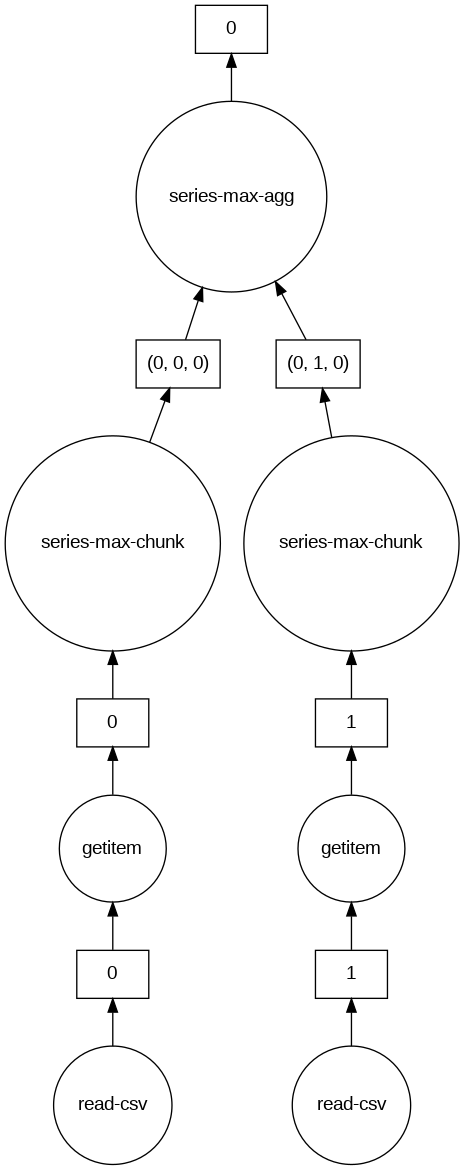

In [11]:

findMax.visualize()


In [12]:
groupBy = df.groupby("CARRIER_NAME").NUMBER_OF_SEATS.sum()
groupBy

Dask Series Structure:
npartitions=1
    int64
      ...
Name: NUMBER_OF_SEATS, dtype: int64
Dask Name: series-groupby-sum-agg, 5 tasks

In [13]:
%%time

groupBy.compute()

CPU times: user 17.7 ms, sys: 9.38 ms, total: 27.1 ms
Wall time: 1.54 s


CARRIER_NAME
Alaska Airlines Inc.             3005600
Allegiant Air                     300699
American Airlines Inc.          11834682
American Eagle Airlines Inc.     1003322
Atlantic Southeast Airlines      1021995
Comair Inc.                      1290920
Delta Air Lines Inc.            10999721
Endeavor Air Inc.                1100036
Frontier Airlines Inc.           1638222
Hawaiian Airlines Inc.            975477
JetBlue Airways                  2861057
Mesa Airlines Inc.               1086868
Midwest Airline, Inc.            1684937
SkyWest Airlines Inc.            2980314
Southwest Airlines Co.          15807529
Spirit Air Lines                 2571565
United Air Lines Inc.            7037661
Name: NUMBER_OF_SEATS, dtype: int64

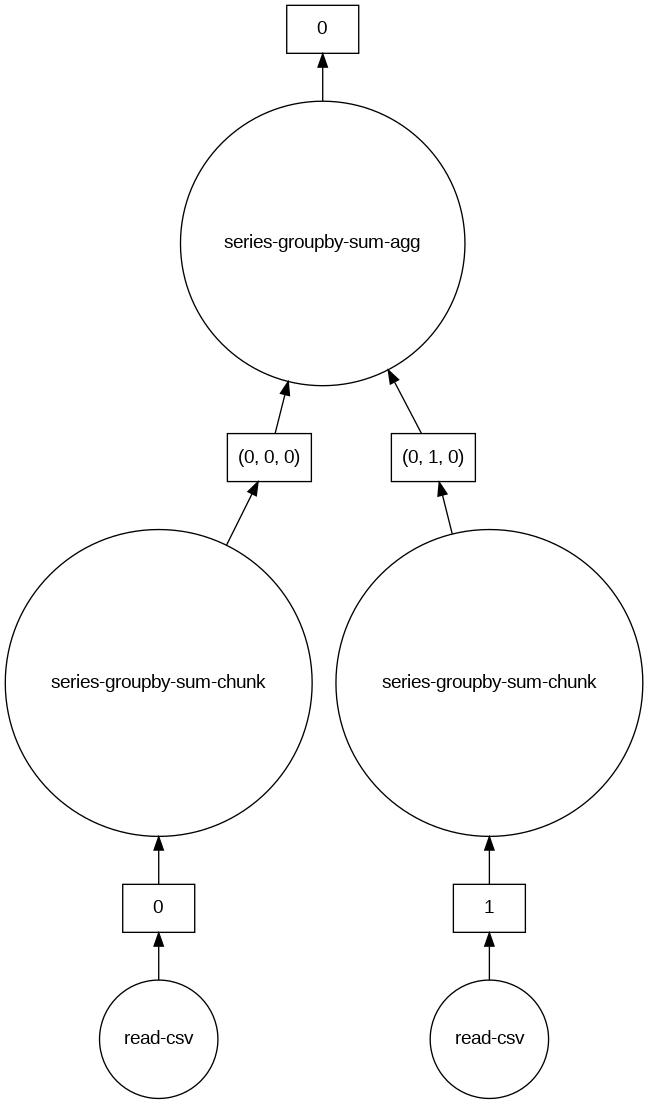

In [14]:
groupBy.visualize()

In [15]:
df = df.persist()

In [16]:
groupBy = df.groupby("CARRIER_NAME").NUMBER_OF_SEATS.sum()
groupBy

Dask Series Structure:
npartitions=1
    int64
      ...
Name: NUMBER_OF_SEATS, dtype: int64
Dask Name: series-groupby-sum-agg, 5 tasks

In [17]:
%%time

groupBy.compute()

CPU times: user 20.9 ms, sys: 6.26 ms, total: 27.1 ms
Wall time: 1.46 s


CARRIER_NAME
Alaska Airlines Inc.             3005600
Allegiant Air                     300699
American Airlines Inc.          11834682
American Eagle Airlines Inc.     1003322
Atlantic Southeast Airlines      1021995
Comair Inc.                      1290920
Delta Air Lines Inc.            10999721
Endeavor Air Inc.                1100036
Frontier Airlines Inc.           1638222
Hawaiian Airlines Inc.            975477
JetBlue Airways                  2861057
Mesa Airlines Inc.               1086868
Midwest Airline, Inc.            1684937
SkyWest Airlines Inc.            2980314
Southwest Airlines Co.          15807529
Spirit Air Lines                 2571565
United Air Lines Inc.            7037661
Name: NUMBER_OF_SEATS, dtype: int64

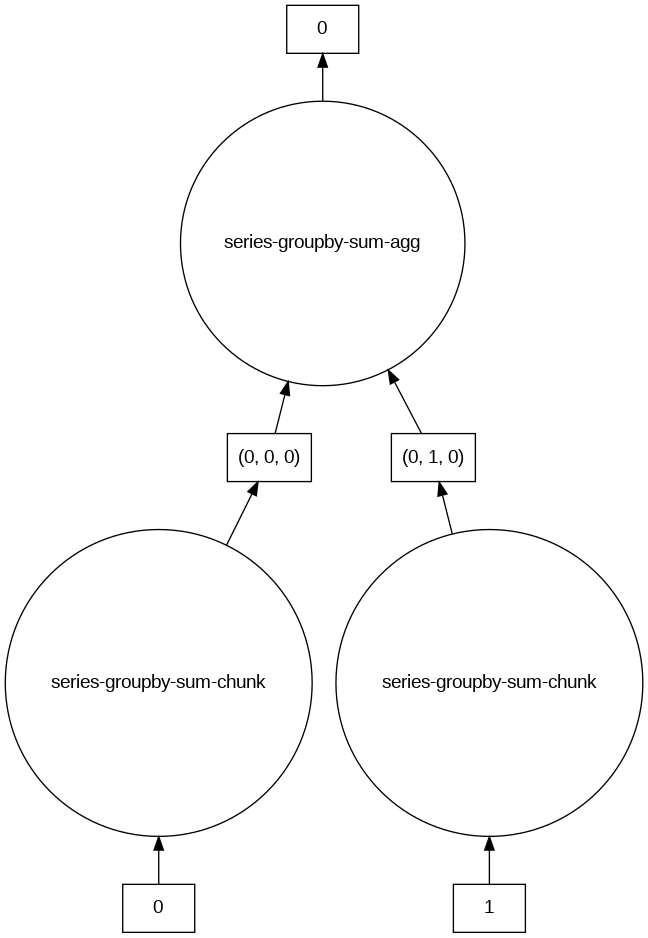

In [18]:
groupBy.visualize()

In [19]:
findMax = df.NUMBER_OF_SEATS.max()
findMax

dd.Scalar<series-..., dtype=int64>

In [20]:

%%time

findMax.compute()


CPU times: user 16.2 ms, sys: 11.2 ms, total: 27.4 ms
Wall time: 53.6 ms


337

In [107]:
groupBy = df.groupby("CARRIER_NAME").agg({'NUMBER_OF_SEATS':['sum', 'max'],
                         'DEP_DEL15':'sum',
                         'PLANE_AGE':'mean'})


In [111]:
%%time
groupBy.compute()

CPU times: user 16.2 ms, sys: 3.49 ms, total: 19.7 ms
Wall time: 122 ms


NUMBER_OF_SEATS      DEP_DEL15  PLANE_AGE
                                         sum  max       sum       mean
CARRIER_NAME                                                          
Alaska Airlines Inc.                 3005600  185      2579   8.246079
Allegiant Air                         300699  129       501  11.000000
American Airlines Inc.              11834682  304     11708  11.202736
American Eagle Airlines Inc.         1003322  129      3497  11.998697
Atlantic Southeast Airlines          1021995  129      2038  12.373071
Comair Inc.                          1290920  129      2531   9.758400
Delta Air Lines Inc.                10999721  306      9055  15.513749
Endeavor Air Inc.                    1100036  129      3133  10.515995
Frontier Airlines Inc.               1638222  230      2120   4.678322
Hawaiian Airlines Inc.                975477  294       561  14.201456
JetBlue Airways                      2861057  200      5796  11.565571
Mesa Airlines Inc.                   1086868  129      2356   9.603294
Midwest Airline, Inc.                1684937   76      4450   9.445689
SkyWest Airlines Inc.                2980314  129      9160   9.892376
Southwest Airlines Co.              15807529  175     18125  11.698691
Spirit Air Lines                     2571565  228      2015   5.717124
United Air Lines Inc.                7037661  337      8057  15.003666

In [96]:
df2 = df.repartition(npartitions=2)

In [97]:
df2 = df2.persist()

In [98]:

groupBy = df2.groupby("CARRIER_NAME").NUMBER_OF_SEATS.sum()
groupBy


Dask Series Structure:
npartitions=1
    int64
      ...
Name: NUMBER_OF_SEATS, dtype: int64
Dask Name: series-groupby-sum-agg, 5 tasks

In [99]:
%%time

groupBy.compute()

CPU times: user 14.7 ms, sys: 996 µs, total: 15.6 ms
Wall time: 81 ms


CARRIER_NAME
Alaska Airlines Inc.             3005600
Allegiant Air                     300699
American Airlines Inc.          11834682
American Eagle Airlines Inc.     1003322
Atlantic Southeast Airlines      1021995
Comair Inc.                      1290920
Delta Air Lines Inc.            10999721
Endeavor Air Inc.                1100036
Frontier Airlines Inc.           1638222
Hawaiian Airlines Inc.            975477
JetBlue Airways                  2861057
Mesa Airlines Inc.               1086868
Midwest Airline, Inc.            1684937
SkyWest Airlines Inc.            2980314
Southwest Airlines Co.          15807529
Spirit Air Lines                 2571565
United Air Lines Inc.            7037661
Name: NUMBER_OF_SEATS, dtype: int64

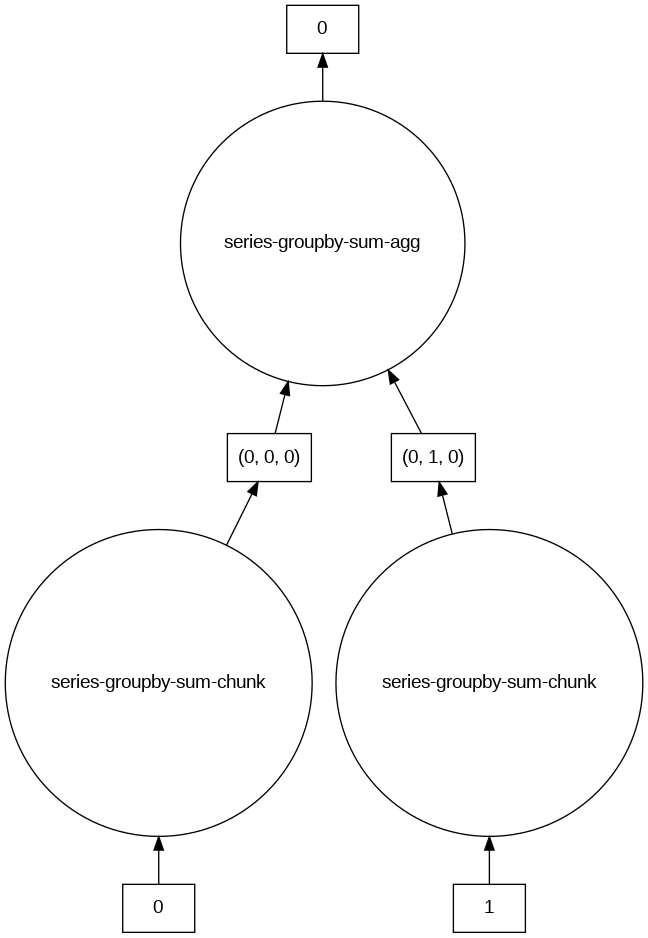

In [100]:
groupBy.visualize()

In [101]:
groupBy = df.groupby("CARRIER_NAME").agg({'NUMBER_OF_SEATS':['sum', 'max'],
                         'DEP_DEL15':'sum',
                         'PLANE_AGE':'mean'})

In [106]:
%%time
groupBy.compute()

CPU times: user 16.4 ms, sys: 5.45 ms, total: 21.8 ms
Wall time: 818 ms


NUMBER_OF_SEATS      DEP_DEL15  PLANE_AGE
                                         sum  max       sum       mean
CARRIER_NAME                                                          
Alaska Airlines Inc.                 3005600  185      2579   8.246079
Allegiant Air                         300699  129       501  11.000000
American Airlines Inc.              11834682  304     11708  11.202736
American Eagle Airlines Inc.         1003322  129      3497  11.998697
Atlantic Southeast Airlines          1021995  129      2038  12.373071
Comair Inc.                          1290920  129      2531   9.758400
Delta Air Lines Inc.                10999721  306      9055  15.513749
Endeavor Air Inc.                    1100036  129      3133  10.515995
Frontier Airlines Inc.               1638222  230      2120   4.678322
Hawaiian Airlines Inc.                975477  294       561  14.201456
JetBlue Airways                      2861057  200      5796  11.565571
Mesa Airlines Inc.                   1086868  129      2356   9.603294
Midwest Airline, Inc.                1684937   76      4450   9.445689
SkyWest Airlines Inc.                2980314  129      9160   9.892376
Southwest Airlines Co.              15807529  175     18125  11.698691
Spirit Air Lines                     2571565  228      2015   5.717124
United Air Lines Inc.                7037661  337      8057  15.003666

In [41]:
groupBy = df.groupby("CARRIER_NAME").agg({'NUMBER_OF_SEATS':'sum',
                         'DEP_DEL15':'sum',
                         'PLANE_AGE':'mean'})

In [82]:



X = groupBy.NUMBER_OF_SEATS.compute().values.reshape(-1, 1)
Y = groupBy.DEP_DEL15.values.compute().reshape(-1, 1)


CPU times: user 107 ms, sys: 10.5 ms, total: 118 ms
Wall time: 338 ms


In [88]:
%%time

from dask_ml.linear_model import LinearRegression

regr = LinearRegression()
# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X)

CPU times: user 104 ms, sys: 8.89 ms, total: 113 ms
Wall time: 192 ms


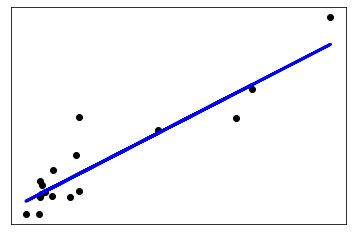

In [89]:

import matplotlib.pyplot as plt
plt.scatter(X, Y,  color='black')
plt.plot(X, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [155]:
X=df[['AIRPORT_FLIGHTS_MONTH', 'NUMBER_OF_SEATS']].compute()  # Features
y=df['DEP_DEL15'].compute()


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [159]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)




In [160]:
with joblib.parallel_backend("dask"):
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

In [161]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8254556319091724
